In [4]:
import numpy as np
import pandas as pd
from math import lgamma
from ast import literal_eval, parse
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
#%matplotlib inline

path = '/Users/chrislam/Desktop/sculpting/'
k = pd.Series([833, 134, 38, 15, 5, 0]) # "ground truth" Kepler transit multiplicity
nonzero_k = pd.Series([66355, 833, 134, 38, 15, 5, 0]) # "ground truth" Kepler transit multiplicity

In [5]:
#https://stackoverflow.com/questions/52232742/how-to-use-ast-literal-eval-in-a-pandas-dataframe-and-handle-exceptions
def literal_eval_w_exceptions(x):
    try:
        return literal_eval(str(x))   
    except Exception as e:
        #print(e)
        pass
    
def float_w_exceptions(x):
    try:
        return float(x)   
    except Exception as e:
        #print(e)
        pass

In [53]:
# change path here to get logLs_incremental_corrected.txt
df = pd.read_csv(path+'hipergator/logLs_incremental_corrected2.txt', sep='\t', error_bad_lines=False, skiprows=1, index_col=False,
                 names=['filename','m','b','c','f','logL','transit_multiplicity','intact_frac',
                            'disrupted_frac','intact_frac2','disrupted_frac2','intact_logL','intact_transit_multiplicity','disrupted_logL',
                        'disrupted_transit_multiplicity','young10_logL','young10_transit_multiplicity',
                        'old10_logL','old10_transit_multiplicity','young15_logL','young15_transit_multiplicity',
                        'old15_logL','old15_transit_multiplicity','young20_logL','young20_transit_multiplicity',
                        'old20_logL','old20_transit_multiplicity','young25_logL','young25_transit_multiplicity',
                        'old25_logL','old25_transit_multiplicity','young30_logL','young30_transit_multiplicity',
                        'old30_logL','old30_transit_multiplicity','young35_logL','young35_transit_multiplicity',
                        'old35_logL','old35_transit_multiplicity','young40_logL','young40_transit_multiplicity',
                        'old40_logL','old40_transit_multiplicity','young45_logL','young45_transit_multiplicity',
                        'old45_logL','old45_transit_multiplicity','young50_logL','young50_transit_multiplicity',
                        'old50_logL','old50_transit_multiplicity'], dtype=str)
print(df.head())
#print(df.columns)
print(df.transit_multiplicity[0])
#print(df.logL)

df.transit_multiplicity = df.transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
#df.transit_multiplicity = df.transit_multiplicity.apply(lambda y: np.nan if len(y)==0 else y)
#df.logL = df.logL.apply(str) # convert back from string to list of floats
df.logL = df.logL.apply(float_w_exceptions) # convert back from string to list of floats
df.m = df.m.apply(float_w_exceptions) # convert back from string to list of floats
df.b = df.b.apply(float_w_exceptions) # convert back from string to list of floats
df.c = df.c.apply(float_w_exceptions) # convert back from string to list of floats
df.f = df.f.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_frac = df.intact_frac.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_frac = df.disrupted_frac.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_frac2 = df.intact_frac2.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_frac2 = df.disrupted_frac2.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_logL = df.intact_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_transit_multiplicity = df.intact_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.disrupted_logL = df.disrupted_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_transit_multiplicity = df.disrupted_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young10_logL = df.young10_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young10_transit_multiplicity = df.young10_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old10_logL = df.old10_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old10_transit_multiplicity = df.old10_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young15_logL = df.young15_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young15_transit_multiplicity = df.young15_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old15_logL = df.old15_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old15_transit_multiplicity = df.old15_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young20_logL = df.young20_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young20_transit_multiplicity = df.young20_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old20_logL = df.old20_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old20_transit_multiplicity = df.old20_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young25_logL = df.young25_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young25_transit_multiplicity = df.young25_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old25_logL = df.old25_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old25_transit_multiplicity = df.old25_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young30_logL = df.young30_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young30_transit_multiplicity = df.young30_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old30_logL = df.old30_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old30_transit_multiplicity = df.old30_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young35_logL = df.young35_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young35_transit_multiplicity = df.young35_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old35_logL = df.old35_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old35_transit_multiplicity = df.old35_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young40_logL = df.young40_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young40_transit_multiplicity = df.young40_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old40_logL = df.old40_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old40_transit_multiplicity = df.old40_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young45_logL = df.young45_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young45_transit_multiplicity = df.young45_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old45_logL = df.old45_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old45_transit_multiplicity = df.old45_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young50_logL = df.young50_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young50_transit_multiplicity = df.young50_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old50_logL = df.old50_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old50_transit_multiplicity = df.old50_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats



                                            filename     m    b            c  \
0  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
1  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
2  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
3  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
4  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   

     f                logL            transit_multiplicity intact_frac  \
0  0.0  -5434.568554576411  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]         0.0   
1  0.0  -5434.568554576411  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]         0.0   
2  0.0  -5434.568554576411  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]         0.0   
3  0.0  -5434.568554576411  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]         0.0   
4  0.0  -5434.568554576411  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]         0.0   

  disrupted_frac intact_frac2  ...          old40_logL  \
0            0.0

In [54]:
import copy 

def add_zero_bin(curr_row: pd.Series):
    temp = copy.copy(curr_row.transit_multiplicity)
    temp.insert(0, 67380-np.sum(temp))
    
    return temp

df['transit_multiplicity_zero_bin'] = df.apply(func=add_zero_bin, axis=1)
print(df['transit_multiplicity_zero_bin'])

0                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
4                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
                               ...                        
78315    [61179.0, 2277.9, 1598.4, 1112.4, 762.30000000...
78316    [61193.4, 2264.4, 1539.0, 1152.9, 797.4, 366.3...
78317    [60460.0, 2612.0, 1717.0, 1259.0, 816.0, 430.0...
78318    [60490.0, 2531.0, 1776.0, 1236.0, 847.0, 409.0...
78319    [60506.0, 2516.0, 1710.0, 1281.0, 886.0, 407.0...
Name: transit_multiplicity_zero_bin, Length: 78320, dtype: object


In [55]:
def normalize(curr_row: pd.Series, column):
    """
    First, remove fraction of planet-hosting systems from each multiplicity. 
    Then, normalize against sample total planet-hosting systems. 
    """
    #print(curr_row)
    first = curr_row[column]
    first += [0.] * (6 - len(first)) # pad with zeros to match length of k
    second = curr_row['f'] ### removed as of 13 June 2022 because the following step takes care of this
    #print(first)
    #print(second)
    
    try:
        # remove previous normalization
        first = [np.array(fl)/second for fl in first] ### removed as of 13 June 2022 because the following step takes care of this
        
        # normalize against Kepler data s.t. sum of every transit multiplicity is 1025
        if column=='transit_multiplicity_zero_bin': # zero bin case
            return [np.array(fl)*sum(k)/sum(first[1:]) for fl in first]
        
        elif column=='transit_multiplicity': # excluding zero bin            
            return [np.array(fl)*sum(k)/sum(first) for fl in first]
    
    except Exception as e: # return list of N nans, where N is length of transit multiplicity array    
        print(e)
        try: # eg. divide by zero for f=0; we don't care about those
            return np.nan*np.ones(len(first))
        
        except: # eg. accessed one too many levels
            return np.nan

def normalized_loglike(lam, k):
    """
    Calculate Poisson log likelihood
    Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of floats)
    - k: Kepler transit multiplicity; normally a global variable, but this is so it's flexible to including the zero-bin (list of floats)

    Returns: Poisson log likelihood (float)
    """
    logL = []
    try:
        for i in range(len(lam)):
            if lam[i]==0:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = 0
                logL.append(term1+term2+term3)

            else:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = k[i]*np.log(lam[i])
                logL.append(term1+term2+term3)
    except:
        #print(lam)
        return np.nan
    
    return np.sum(logL)    

#normalized_k = k/sum(k)
df['normalized_transit_multiplicity'] = df.apply(func=normalize, args=['transit_multiplicity'], axis=1)
df['normalized_transit_multiplicity_zero_bin'] = df.apply(func=normalize, args=['transit_multiplicity_zero_bin'], axis=1)
#df['normalized_logL'] = better_loglike(df['normalized_transit_multiplicity'], normalized_k)
df['normalized_logL'] = df['normalized_transit_multiplicity'].apply(func=normalized_loglike, args=[k])
df['normalized_logL_zero_bin'] = df['normalized_transit_multiplicity_zero_bin'].apply(func=normalized_loglike, args=[nonzero_k])

df['likelihood'] = np.exp(df['logL'])
df['normalized_likelihood'] = np.exp(df['normalized_logL'])
df['normalized_likelihood_zero_bin'] = np.exp(df['normalized_logL_zero_bin'])


/var/folders/h2/sp_lfvz5515bhg_y92psw7f80000gn/T/ipykernel_6532/2909688228.py:15: RuntimeWarning: invalid value encountered in true_divide
  first = [np.array(fl)/second for fl in first] ### removed as of 13 June 2022 because the following step takes care of this
/var/folders/h2/sp_lfvz5515bhg_y92psw7f80000gn/T/ipykernel_6532/2909688228.py:15: RuntimeWarning: divide by zero encountered in true_divide
  first = [np.array(fl)/second for fl in first] ### removed as of 13 June 2022 because the following step takes care of this


In [9]:
df.loc[df.normalized_logL_zero_bin > -50]

,filename,m,b,c,f,logL,transit_multiplicity,intact_frac,disrupted_frac,intact_frac2,...,old50_logL,old50_transit_multiplicity,transit_multiplicity_zero_bin,normalized_transit_multiplicity,normalized_transit_multiplicity_zero_bin,normalized_logL,normalized_logL_zero_bin,likelihood,normalized_likelihood,normalized_likelihood_zero_bin
2430,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.2,1.000000e+08,0.2,-33.087143,"[782.2, 137.6, 51.800000000000004, 32.2, 15.8,...",0.095129,0.104871,0.198397,...,-230.323669,"[397.8, 63.0, 25.8, 15.200000000000001, 6.6000...","[66356.2, 782.2, 137.6, 51.800000000000004, 32...","[783.1168196913459, 137.76128150029302, 51.860...","[66433.97636257081, 783.1168196913459, 137.761...",-33.086440,-39.603729,4.270082e-15,4.273085e-15,6.314209e-18
2438,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.2,1.000000e+08,0.2,-36.607052,"[771.6, 138.8, 47.0, 37.6, 18.0, 3.40000000000...",0.094799,0.105201,0.197358,...,-242.277625,"[380.40000000000003, 72.8, 21.400000000000002,...","[66363.6, 771.6, 138.8, 47.0, 37.6, 18.0, 3.40...","[778.1286894923257, 139.97441951987406, 47.397...","[66925.11806375442, 778.1286894923257, 139.974...",-36.570770,-45.476368,1.264036e-16,1.310739e-16,1.777724e-20
7376,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.6,1.584893e+08,0.2,-36.620767,"[772.6, 143.6, 51.6, 36.2, 17.2, 3.6]",0.095318,0.104682,0.198917,...,-246.875736,"[379.40000000000003, 67.4, 23.6, 18.4000000000...","[66355.2, 772.6, 143.6, 51.6, 36.2, 17.2, 3.6]","[772.7507806401247, 143.62802498048399, 51.610...","[66368.14988290396, 772.7507806401247, 143.628...",-36.620748,-43.092378,1.246817e-16,1.246842e-16,1.928494e-19
7377,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.6,1.584893e+08,0.2,-37.510578,"[770.4000000000001, 129.20000000000002, 53.2, ...",0.095029,0.104971,0.197907,...,-252.465514,"[377.20000000000005, 64.2, 24.6, 17.4000000000...","[66368.4, 770.4000000000001, 129.2000000000000...","[780.6049822064057, 130.91142744167655, 53.904...","[67247.53855278765, 780.6049822064057, 130.911...",-37.422217,-49.842004,5.121096e-17,5.594196e-17,2.258879e-22
25011,/blue/sarahballard/c.lam/sculpting2/simulation...,-1.4,0.2,1.000000e+08,0.2,-35.631326,"[774.6, 130.0, 53.800000000000004, 36.2, 15.20...",0.096225,0.103775,0.202286,...,-244.198532,"[387.20000000000005, 61.6, 23.8, 17.2, 6.4, 1.8]","[66366.4, 774.6, 130.0, 53.800000000000004, 36...","[783.311957379637, 131.46211523283347, 54.4050...","[67112.82557221783, 783.311957379637, 131.4621...",-35.567456,-46.332592,3.353605e-16,3.574785e-16,7.551111e-21
35273,/blue/sarahballard/c.lam/sculpting2/simulation...,-1.0,0.8,3.981072e+08,0.2,-41.454200,"[764.2, 139.20000000000002, 56.2, 38.2, 18.6, ...",0.096009,0.103991,0.201024,...,-249.512965,"[377.40000000000003, 65.2, 29.6, 15.4, 6.4, 2.2]","[66359.2, 764.2, 139.20000000000002, 56.2, 38....","[767.3442398119121, 139.77272727272728, 56.431...","[66632.22962382445, 767.3442398119121, 139.772...",-41.445572,-48.493420,9.923607e-19,1.000960e-18,8.701121e-22
42928,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.6,0.7,6.309573e+08,0.2,-42.019180,"[765.6, 141.6, 51.800000000000004, 38.40000000...",0.101918,0.098082,0.221134,...,-255.610432,"[373.0, 65.8, 27.8, 18.2, 9.4, 1.6]","[66357.0, 765.6, 141.6, 51.800000000000004, 38...","[767.0967741935484, 141.87683284457478, 51.901...","[66486.7302052786, 767.0967741935484, 141.8768...",-42.017226,-48.618138,5.640299e-19,5.651330e-19,7.680882e-22
43325,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.6,0.8,1.000000e+09,0.2,-31.945092,"[771.2, 136.0, 52.400000000000006, 35.80000000...",0.095174,0.104826,0.198679,...,-239.580117,"[383.8, 67.8, 27.0, 19.6, 4.800000000000001, 1...","[66370.4, 771.2, 136.0, 52.400000000000006, 35...","[782.9635499207607, 138.0744849445325, 53.1992...","[67382.7852614897, 782.9635499207607, 138.0744...",-31.828232,-46.177090,1.337897e-14,1.503746e-14,8.821547e-21
46684,/blue/sarahballard/c.lam/sculpting2/sim

In [10]:
df.transit_multiplicity

0                           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1                           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2                           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3                           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
4                           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
                               ...                        
78315    [2277.9, 1598.4, 1112.4, 762.3000000000001, 36...
78316    [2264.4, 1539.0, 1152.9, 797.4, 366.3, 66.6000...
78317         [2612.0, 1717.0, 1259.0, 816.0, 430.0, 86.0]
78318         [2531.0, 1776.0, 1236.0, 847.0, 409.0, 91.0]
78319         [2516.0, 1710.0, 1281.0, 886.0, 407.0, 74.0]
Name: transit_multiplicity, Length: 78320, dtype: object

In [11]:
df.transit_multiplicity_zero_bin

0                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
4                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
                               ...                        
78315    [61179.0, 2277.9, 1598.4, 1112.4, 762.30000000...
78316    [61193.4, 2264.4, 1539.0, 1152.9, 797.4, 366.3...
78317    [60460.0, 2612.0, 1717.0, 1259.0, 816.0, 430.0...
78318    [60490.0, 2531.0, 1776.0, 1236.0, 847.0, 409.0...
78319    [60506.0, 2516.0, 1710.0, 1281.0, 886.0, 407.0...
Name: transit_multiplicity_zero_bin, Length: 78320, dtype: object

In [12]:
df.normalized_transit_multiplicity

0                           [nan, nan, nan, nan, nan, nan]
1                           [nan, nan, nan, nan, nan, nan]
2                           [nan, nan, nan, nan, nan, nan]
3                           [nan, nan, nan, nan, nan, nan]
4                           [nan, nan, nan, nan, nan, nan]
                               ...                        
78315    [376.5275761973875, 264.20899854862114, 183.87...
78316    [375.16729706139074, 254.9825429153331, 191.01...
78317    [386.89306358381504, 254.32442196531792, 186.4...
78318    [376.52757619738753, 264.2089985486212, 183.87...
78319    [375.16729706139074, 254.98254291533314, 191.0...
Name: normalized_transit_multiplicity, Length: 78320, dtype: object

In [13]:
df.normalized_transit_multiplicity_zero_bin

0                      [inf, nan, nan, nan, nan, nan, nan]
1                      [inf, nan, nan, nan, nan, nan, nan]
2                      [inf, nan, nan, nan, nan, nan, nan]
3                      [inf, nan, nan, nan, nan, nan, nan]
4                      [inf, nan, nan, nan, nan, nan, nan]
                               ...                        
78315    [10112.639090469278, 376.5275761973875, 264.20...
78316    [10138.563184948112, 375.16729706139074, 254.9...
78317    [8955.41907514451, 386.89306358381504, 254.324...
78318    [8998.87518142235, 376.52757619738753, 264.208...
78319    [9022.206866453302, 375.16729706139074, 254.98...
Name: normalized_transit_multiplicity_zero_bin, Length: 78320, dtype: object

In [14]:
df.normalized_logL

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
78315   -480.541302
78316   -486.174721
78317   -462.889185
78318   -480.541302
78319   -486.174721
Name: normalized_logL, Length: 78320, dtype: float64

In [15]:
df.normalized_logL_zero_bin

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
78315   -69073.871696
78316   -68935.543569
78317   -75962.937204
78318   -75702.836972
78319   -75559.983889
Name: normalized_logL_zero_bin, Length: 78320, dtype: float64

In [56]:
def better_loglike(lam, k):
    """
    Calculate Poisson log likelihood
    Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of ints)
    - k: Kepler transit multiplicity (list of ints); can accept alternate ground truths as well

    Returns: Poisson log likelihood (float)
    """
    
    logL = []
    #print(lam)
    for i in range(len(lam)):
        try:
            if lam[i]==0:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = 0
                logL.append(term1+term2+term3)

            else:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = k[i]*np.log(lam[i])
                logL.append(term1+term2+term3)
        except Exception as e:
            #print("error here: ", lam)
            #print("error: ", e)
            return lam

    return np.sum(logL)

def pad(lam):
    lam += [0.] * (6 - len(lam)) # pad with zeros to match length of k
    return lam

def fix_c_for_flat_models(m, c):
    if m==0:
        return 1e8
    else:
        return c
    
def redundancy_check(m, b, cutoff):
    # skip simulations if cutoff occurs more than once after probability has reached zero (use the first one for all)
    # also don't vary cutoffs if m is flat   

    y = b + m*(np.log10(cutoff)-8)
    if y < 0:
        return False
    #elif m==0:
    #    return False
    else:
        return True
    
### in order to marginalize over posteriors, I need to add. In order to add, I need to unlog
df['normalized_likelihood'] = np.exp(df['normalized_logL'])
    
# c's that span cutoff time parameter space don't make sense for m=0. Set those all to minimum cutoff time.
df['fixed_c'] = df.apply(lambda x: fix_c_for_flat_models(x.m, x.c), axis=1)
df['redundant'] = df.apply(lambda x: redundancy_check(x.m, x.b, x.fixed_c), axis=1)

# re-evaluate logL based on new k
#df['padded_transit_multiplicities'] = df.transit_multiplicity.apply(pad)

#df['corrected_logL'] = df.padded_transit_multiplicities.apply(lambda x: better_loglike(x, pad(list(k))))


In [80]:
df.loc[(df.normalized_logL_zero_bin >= -100)] 

,filename,m,b,c,f,logL,transit_multiplicity,intact_frac,disrupted_frac,intact_frac2,...,transit_multiplicity_zero_bin,normalized_transit_multiplicity,normalized_transit_multiplicity_zero_bin,normalized_logL,normalized_logL_zero_bin,likelihood,normalized_likelihood,normalized_likelihood_zero_bin,fixed_c,redundant
2430,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.2,1.000000e+08,0.2,-33.087143,"[782.2, 137.6, 51.800000000000004, 32.2, 15.8,...",0.095129,0.104871,0.198397,...,"[66356.2, 782.2, 137.6, 51.800000000000004, 32...","[783.116819691346, 137.761281500293, 51.860714...","[66433.9763625708, 783.116819691346, 137.76128...",-33.086440,-39.603729,4.270082e-15,4.273085e-15,6.314209e-18,100000000.0,True
2431,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.2,1.000000e+08,0.2,-34.554550,"[767.0, 135.6, 49.6, 34.2, 16.400000000000002,...",0.095414,0.104586,0.199065,...,"[66373.6, 767.0, 135.6, 49.6, 34.2, 16.4000000...","[781.1754769475358, 138.10612082670903, 50.516...","[67600.29809220985, 781.1754769475358, 138.106...",-34.383719,-52.395256,9.843504e-16,1.167725e-15,1.758042e-23,100000000.0,True
2433,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.2,1.000000e+08,0.2,-38.996619,"[750.2, 127.60000000000001, 52.800000000000004...",0.096081,0.103919,0.201365,...,"[66392.2, 750.2, 127.60000000000001, 52.800000...","[778.4521158129176, 132.4053452115813, 54.7884...","[68892.49341972057, 778.4521158129176, 132.405...",-38.304784,-92.090972,1.158734e-17,2.314428e-17,1.012509e-40,100000000.0,True
2434,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.2,1.000000e+08,0.2,-38.684597,"[764.4000000000001, 131.6, 52.800000000000004,...",0.095939,0.104061,0.200787,...,"[66372.8, 764.4000000000001, 131.6, 52.8000000...","[777.9090548054012, 133.92573471008734, 53.733...","[67545.79030976965, 777.9090548054012, 133.925...",-38.528228,-55.557233,1.583045e-17,1.850987e-17,7.443899e-25,100000000.0,True
2436,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.2,1.000000e+08,0.2,-38.937832,"[765.4000000000001, 133.0, 49.400000000000006,...",0.096597,0.103403,0.202983,...,"[66370.8, 765.4000000000001, 133.0, 49.4000000...","[777.3830757035277, 135.08224336107807, 50.173...","[67409.89892984543, 777.3830757035277, 135.082...",-38.814791,-53.582582,1.228894e-17,1.389794e-17,5.362663e-24,100000000.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75614,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.3,1.000000e+10,0.2,-65.984589,"[727.2, 158.60000000000002, 67.8, 50.400000000...",0.122110,0.077890,0.299362,...,"[66345.8, 727.2, 158.60000000000002, 67.8, 50....","[720.7309998066138, 157.18913169599693, 67.196...","[65755.60336491975, 720.7309998066138, 157.189...",-65.943546,-75.137516,2.204232e-29,2.296581e-29,2.334486e-33,100000000.0,True
75617,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.3,1.000000e+10,0.2,-76.014493,"[711.8000000000001, 160.60000000000002, 82.800...",0.121713,0.078287,0.297047,...,"[66343.8, 711.8000000000001, 160.6000000000000...","[704.1063501254584, 158.86411889596604, 81.905...","[65626.70816444702, 704.1063501254584, 158.864...",-75.953745,-86.450312,9.712371e-34,1.032067e-33,2.851719e-38,100000000.0,True
75618,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.3,1.000000e+10,0.2,-65.614417,"[728.6, 158.20000000000002, 76.60000000000001,...",0.121751,0.078249,0.298293,...,"[66341.8, 728.6, 158.20000000000002, 76.600000...","[719.336351377384, 156.18859564631092, 75.6260...","[65498.30957426315, 719.336351377384, 156.1885...",-65.530145,-77.578780,3.191689e-29,3.472319e-29,2.032189e-34,100000000.0,True
75619,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.3,1.000000e+10,0.2,-82.669834,"[702.6, 162.4, 73.2, 57.0, 29.400000000000002,...",0.122279,0.077721,0.300000,...,"[66349.0, 702.6, 162.4, 73.2, 57.0, 29.4000000...","[698.5111542192046, 161.454898157129, 72.77400...","[65962.87584869059, 698.5111542192046, 161.454

In [88]:
### make logL-based cut
threshold = -100 # -50
#df_keep = df.loc[(df.normalized_logL >= threshold)] 
###df_keep = df.loc[(df.normalized_logL >= threshold)] 
df_keep = df.loc[(df.normalized_logL_zero_bin >= threshold)] 
print(len(df_keep), len(df))

627 78320


remaining based on transit multiplicity:  9750
remaining after ruling out intact fractions:  9750


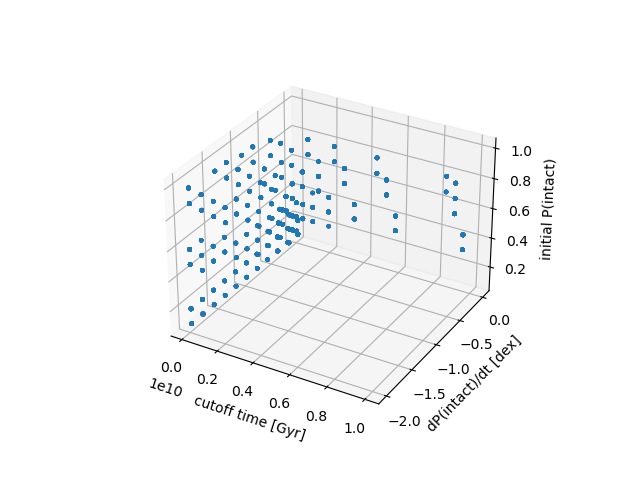

In [21]:
%matplotlib widget

#df_keep['intact_frac_over_planets'] = df_keep.intact_frac/(df_keep.intact_frac+df_keep.disrupted_frac)
#df_keep = df_keep.loc[df_keep.corrected_logL >= threshold] # rule out models based on transit multiplicity
print("remaining based on transit multiplicity: ", len(df_keep))
#df_keep = df_keep.loc[(df_keep.intact_frac2 <= 0.44) & (df_keep.intact_frac2 >= 0.12)]
print("remaining after ruling out intact fractions: ", len(df_keep))
#df_keep = df
fig = plt.figure()
ax = plt.axes(projection='3d')

#im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b, c=df_keep.normalized_logL, s=5)
im = ax.scatter3D(df_keep.fixed_c, df_keep.m, df_keep.b, s=5)
#im1 = ax.scatter3D(df_keep.loc[df_keep.index==1220].c, df_keep.loc[df_keep.index==1220].m, df_keep.loc[df_keep.index==1220].b, s=8, c='r')
#im2 = ax.scatter3D(df_keep.loc[df_keep.index==73279].c, df_keep.loc[df_keep.index==73279].c, df_keep.loc[df_keep.index==73279].c, s=8, c='purple')
ax.set_xlabel('cutoff time [Gyr]')
#ax.set_xscale('log')
ax.set_ylabel('dP(intact)/dt [dex]')
ax.set_zlabel('initial P(intact)')
#fig.colorbar(im, ax=ax)
#fig.tight_layout()
plt.show()

What do the zero-bin-included transit multiplicities look like for the best (normalized) models?

In [23]:
df_keep.reset_index().normalized_transit_multiplicity

0       [853.7732886749006, 116.72597864768683, 27.250...
1       [865.9445498629559, 101.78684376976595, 26.581...
2       [858.5562342038753, 109.01958719460823, 31.302...
3       [858.3014861995755, 108.15817409766454, 27.420...
4       [847.031489175596, 118.79510168379619, 30.0349...
                              ...                        
9745    [778.4420652391435, 128.81729037422454, 58.870...
9746    [789.4742123218945, 125.68231988761791, 50.602...
9747    [772.8322242387578, 137.8654970760234, 58.9080...
9748    [774.3852459016393, 137.70491803278688, 54.918...
9749    [778.2524072935873, 137.33866011063307, 56.909...
Name: normalized_transit_multiplicity, Length: 9750, dtype: object

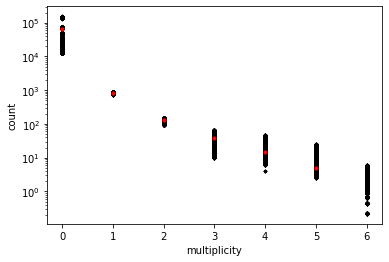

In [67]:
%matplotlib inline

for i in range(len(df_keep)):
    try:
        plt.scatter(np.arange(7), df_keep.reset_index().normalized_transit_multiplicity_zero_bin[i], s=5, color='k')
    except:
        pass
plt.scatter(np.arange(7), nonzero_k, color='red', zorder=2, s=10)
plt.yscale('log')
plt.xlabel('multiplicity')
plt.ylabel('count')
plt.show()

Fraction of planet hosts vs normalized logL

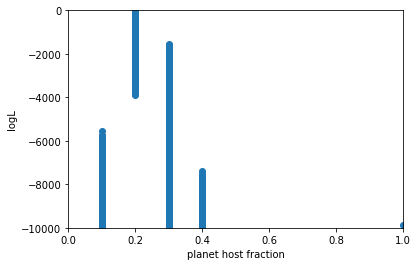

In [66]:
plt.scatter(df.f, df.normalized_logL_zero_bin)
plt.xlabel('planet host fraction')
plt.ylabel('logL')
plt.ylim([-10000, 0])
plt.xlim([0, 1])
plt.savefig('f_v_logL.pdf', format='pdf')
plt.show()

In [29]:
# based on the plot above, impose the assumption that f=0.2
df_keep = df_keep.loc[df_keep.f == 0.2]


In [84]:
df_keep.loc[df_keep.f == 0.2]

,filename,m,b,c,f,logL,transit_multiplicity,intact_frac,disrupted_frac,intact_frac2,...,transit_multiplicity_zero_bin,normalized_transit_multiplicity,normalized_transit_multiplicity_zero_bin,normalized_logL,normalized_logL_zero_bin,likelihood,normalized_likelihood,normalized_likelihood_zero_bin,fixed_c,redundant
1230,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.1,1.000000e+08,0.2,-23.583324,"[795.8000000000001, 108.80000000000001, 25.400...",0.058114,0.141886,0.100564,...,"[66424.6, 795.8000000000001, 108.8000000000000...","[853.7732886749005, 116.72597864768683, 27.250...","[71263.5702323634, 853.7732886749005, 116.7259...",-21.107589,-200.647628,5.726542e-11,6.809115e-10,7.241729e-88,100000000.0,True
1231,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.1,1.000000e+08,0.2,-29.143523,"[801.4000000000001, 94.2, 24.6, 18.0, 7.600000...",0.058030,0.141970,0.100267,...,"[66431.4, 801.4000000000001, 94.2, 24.6, 18.0,...","[865.944549862956, 101.78684376976597, 26.5812...","[71781.76786843769, 865.944549862956, 101.7868...",-26.146328,-243.125175,2.203580e-13,4.413612e-12,2.582725e-106,100000000.0,True
1232,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.1,1.000000e+08,0.2,-24.514963,"[795.4000000000001, 101.0, 29.0, 13.6000000000...",0.058558,0.141442,0.101365,...,"[66430.4, 795.4000000000001, 101.0, 29.0, 13.6...","[858.5562342038754, 109.01958719460825, 31.302...","[71705.09688289805, 858.5562342038754, 109.019...",-21.597738,-232.818066,2.255729e-11,4.170820e-10,7.733900e-102,100000000.0,True
1233,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.1,1.000000e+08,0.2,-26.798516,"[788.8000000000001, 99.4, 25.200000000000003, ...",0.057408,0.142592,0.098828,...,"[66438.0, 788.8000000000001, 99.4, 25.20000000...","[858.3014861995754, 108.15817409766454, 27.420...","[72291.87898089172, 858.3014861995754, 108.158...",-23.244833,-280.456158,2.299071e-12,8.033357e-11,1.582845e-122,100000000.0,True
1234,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.1,1.000000e+08,0.2,-25.852498,"[755.8000000000001, 106.0, 26.8, 15.6000000000...",0.057670,0.142330,0.099466,...,"[66465.4, 755.8000000000001, 106.0, 26.8, 15.6...","[847.0314891755959, 118.79510168379619, 30.034...","[74488.33916466213, 847.0314891755959, 118.795...",-19.442391,-487.056135,5.921104e-12,3.599788e-09,2.979945e-212,100000000.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74407,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.2,1.000000e+10,0.2,-39.495228,"[759.0, 125.60000000000001, 57.400000000000006...",0.095696,0.104304,0.200030,...,"[66380.6, 759.0, 125.60000000000001, 57.400000...","[778.4420652391435, 128.81729037422454, 58.870...","[68080.96357814688, 778.4420652391435, 128.817...",-39.170116,-67.705701,7.037853e-18,9.741700e-18,3.942645e-30,100000000.0,True
74408,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.2,1.000000e+10,0.2,-37.215829,"[767.6, 122.2, 49.2, 37.2, 16.0, 4.4]",0.096286,0.103714,0.201692,...,"[66383.4, 767.6, 122.2, 49.2, 37.2, 16.0, 4.4]","[789.4742123218945, 125.68231988761791, 50.602...","[68275.12040939192, 789.4742123218945, 125.682...",-36.814963,-70.542064,6.876553e-17,1.026750e-16,2.311911e-31,100000000.0,True
74409,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.2,1.000000e+10,0.2,-37.717220,"[747.8000000000001, 133.4, 57.0, 38.0, 12.6000...",0.096035,0.103965,0.200787,...,"[66388.2, 747.8000000000001, 133.4, 57.0, 38.0...","[772.8322242387578, 137.8654970760234, 58.9080...","[68610.51119177253, 772.8322242387578, 137.865...",-37.167642,-81.125030,4.165041e-17,7.216024e-17,5.859320e-36,100000000.0,True
74410,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.2,1.000000e+10,0.2,-38.466918,"[755.8000000000001, 134.4, 53.6, 35.0, 17.2, 4.4]",0.095145,0.104855,0.198442,...,"[66379.6, 755.8000000000001, 134.4, 53.6, 35.0...","[774.3852459016393, 137.70491803278688, 54.918...","[68011.88524590163, 774.3852459016393, 137.704...",-

In [83]:
df_keep.loc[df_keep.normalized_logL_zero_bin > -100]

,filename,m,b,c,f,logL,transit_multiplicity,intact_frac,disrupted_frac,intact_frac2,...,transit_multiplicity_zero_bin,normalized_transit_multiplicity,normalized_transit_multiplicity_zero_bin,normalized_logL,normalized_logL_zero_bin,likelihood,normalized_likelihood,normalized_likelihood_zero_bin,fixed_c,redundant
2430,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.2,1.000000e+08,0.2,-33.087143,"[782.2, 137.6, 51.800000000000004, 32.2, 15.8,...",0.095129,0.104871,0.198397,...,"[66356.2, 782.2, 137.6, 51.800000000000004, 32...","[783.116819691346, 137.761281500293, 51.860714...","[66433.9763625708, 783.116819691346, 137.76128...",-33.086440,-39.603729,4.270082e-15,4.273085e-15,6.314209e-18,100000000.0,True
2431,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.2,1.000000e+08,0.2,-34.554550,"[767.0, 135.6, 49.6, 34.2, 16.400000000000002,...",0.095414,0.104586,0.199065,...,"[66373.6, 767.0, 135.6, 49.6, 34.2, 16.4000000...","[781.1754769475358, 138.10612082670903, 50.516...","[67600.29809220985, 781.1754769475358, 138.106...",-34.383719,-52.395256,9.843504e-16,1.167725e-15,1.758042e-23,100000000.0,True
2433,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.2,1.000000e+08,0.2,-38.996619,"[750.2, 127.60000000000001, 52.800000000000004...",0.096081,0.103919,0.201365,...,"[66392.2, 750.2, 127.60000000000001, 52.800000...","[778.4521158129176, 132.4053452115813, 54.7884...","[68892.49341972057, 778.4521158129176, 132.405...",-38.304784,-92.090972,1.158734e-17,2.314428e-17,1.012509e-40,100000000.0,True
2434,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.2,1.000000e+08,0.2,-38.684597,"[764.4000000000001, 131.6, 52.800000000000004,...",0.095939,0.104061,0.200787,...,"[66372.8, 764.4000000000001, 131.6, 52.8000000...","[777.9090548054012, 133.92573471008734, 53.733...","[67545.79030976965, 777.9090548054012, 133.925...",-38.528228,-55.557233,1.583045e-17,1.850987e-17,7.443899e-25,100000000.0,True
2436,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.2,1.000000e+08,0.2,-38.937832,"[765.4000000000001, 133.0, 49.400000000000006,...",0.096597,0.103403,0.202983,...,"[66370.8, 765.4000000000001, 133.0, 49.4000000...","[777.3830757035277, 135.08224336107807, 50.173...","[67409.89892984543, 777.3830757035277, 135.082...",-38.814791,-53.582582,1.228894e-17,1.389794e-17,5.362663e-24,100000000.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74406,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.2,1.000000e+10,0.2,-38.779553,"[749.2, 127.2, 51.400000000000006, 36.0, 17.0,...",0.095850,0.104150,0.200534,...,"[66395.2, 749.2, 127.2, 51.400000000000006, 36...","[779.7826969943136, 132.3923639317628, 53.4981...","[69105.48334687245, 779.7826969943136, 132.392...",-37.970003,-99.917639,1.439641e-17,3.234724e-17,4.039435e-44,100000000.0,True
74407,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.2,1.000000e+10,0.2,-39.495228,"[759.0, 125.60000000000001, 57.400000000000006...",0.095696,0.104304,0.200030,...,"[66380.6, 759.0, 125.60000000000001, 57.400000...","[778.4420652391435, 128.81729037422454, 58.870...","[68080.96357814688, 778.4420652391435, 128.817...",-39.170116,-67.705701,7.037853e-18,9.741700e-18,3.942645e-30,100000000.0,True
74408,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.2,1.000000e+10,0.2,-37.215829,"[767.6, 122.2, 49.2, 37.2, 16.0, 4.4]",0.096286,0.103714,0.201692,...,"[66383.4, 767.6, 122.2, 49.2, 37.2, 16.0, 4.4]","[789.4742123218945, 125.68231988761791, 50.602...","[68275.12040939192, 789.4742123218945, 125.682...",-36.814963,-70.542064,6.876553e-17,1.026750e-16,2.311911e-31,100000000.0,True
74409,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.2,1.000000e+10,0.2,-37.717220,"[747.8000000000001, 133.4, 57.0, 38.0, 12.6000...",0.096035,0.103965,0.200787,...,"[66388.2, 747.8000000000001, 133.4, 57.0, 38.0...","[772.8322242387578, 137.8654970760234, 58.9080...","[68610.51119177253, 772.8322242387578, 137.865...",-37.167642

Do these normalized, 1+ bin fits match up with the expected intact fraction of 8%? (ie. Now using 20% as the fraction of planet-hosting stars, we'd expect logL to peak at 8 out of 20 planet-hosting stars as being intact, or 40%.)

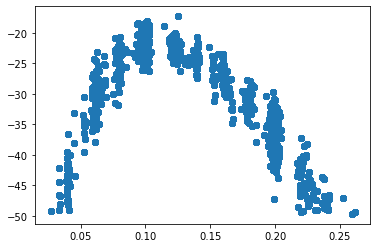

In [71]:
plt.scatter(df_keep.intact_frac2, df_keep.normalized_logL)
plt.show()

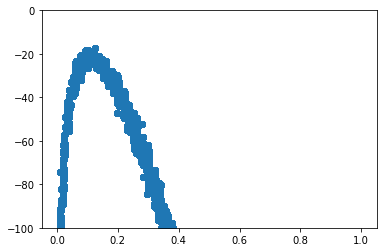

In [78]:
plt.scatter(df.intact_frac2, df.normalized_logL)
plt.ylim([-100, 0])
plt.show()

#### Marginalized and marginalized joint posteriors

fixed_c  1.000000e+08  1.584893e+08  2.511886e+08  3.981072e+08  6.309573e+08  \
b                                                                               
0.1      1.540293e-08  7.865642e-13           NaN           NaN           NaN   
0.2      3.327789e-14  5.494216e-10  1.026479e-09  1.724083e-10  1.803223e-17   
0.3               NaN  2.610803e-09  1.733827e-10  3.027691e-13  8.476500e-11   
0.4               NaN  5.499173e-10  6.970385e-11  2.108125e-12  1.772759e-10   
0.5               NaN  9.871820e-10  2.351056e-09  9.919108e-12  7.504940e-14   
0.6               NaN  8.304121e-16  1.248104e-10  5.402434e-10  1.536118e-10   
0.7               NaN           NaN  5.173859e-11  2.991940e-10  4.948727e-13   
0.8               NaN           NaN  3.400298e-11  7.218796e-12  1.384226e-11   
0.9               NaN           NaN  5.816809e-10  1.622219e-13  7.803646e-10   
1.0               NaN           NaN  3.452870e-16  1.673354e-12  3.015563e-15   

fixed_c  1.000000e+09  1.58

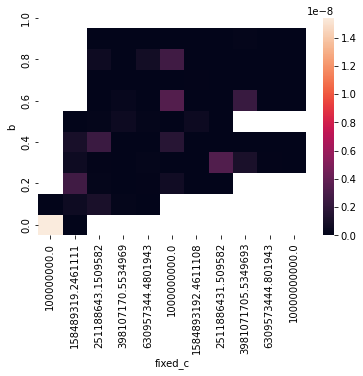

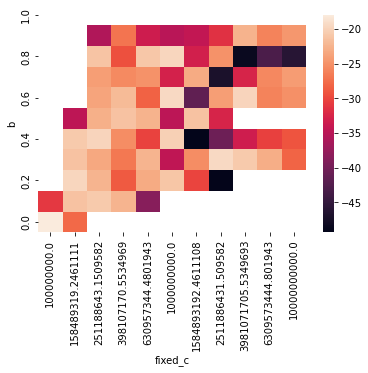

In [62]:
%matplotlib inline
import matplotlib.ticker as ticker

cvals = np.logspace(8, 10, 11)
mvals = np.linspace(-2, 0, 11)
bvals = np.linspace(0, 1, 11)
###tick = ticker.ScalarFormatter(useOffset=True, useMathText=True)
#tick.set_powerlimits((0,0))
###tc = [u"${}$".format(tick.format_data(x)) for x in cvals]
#tc = [u"${}$".format(tick.format_data(x)) for x in cvals]
#"${}$".format(f._formatSciNotation('%1.10e' % x))

piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['b','fixed_c']).sum('normalized_likelihood').reset_index()
#piv = df.loc[df.f == 0.2].groupby(['b','fixed_c','m']).agg({'normalized_likelihood_zero_bin': [np.nanmean]}).reset_index().groupby(['b','fixed_c']).sum('normalized_likelihood_zero_bin').reset_index()
#print(piv)

#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
#print(piv['normalized_likelihood_zero_bin'])

#piv = piv[piv['normalized_likelihood'] > 0] # ie. get rid of 0s that will turn into -inf when I log them
piv = piv.pivot("b", "fixed_c","normalized_likelihood")
#print(np.log(piv))
print(piv)
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values), np.nansum(np.log(piv.values)), np.log(np.nansum(piv.values)))
print(np.nanmin(np.log(piv.values)), np.nanmax(np.log(piv.values)))

#sns.heatmap(piv, fmt='.1e')
ax = sns.heatmap(piv, #xticklabels=tc,
                 yticklabels=df.b.unique().round(1))
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()
plt.show()

ax = sns.heatmap(np.log(piv), fmt='.1e', #xticklabels=tc,
                 yticklabels=df.b.unique().round(1)) # choose vmax as max of the three heatmaps' vmaxes; same idea for vmin
#ax.set_xticks(ax.get_xticks()[::2]) # sample every other tick, for cleanness
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()
fig.tight_layout()
#plt.savefig('marginalize_m_two_cuts.pdf', format='pdf', bbox_inches='tight')
plt.show()

fixed_c  1.000000e+08  1.584893e+08  2.511886e+08  3.981072e+08  6.309573e+08  \
b                                                                               
0.1      1.540293e-08  7.865642e-13           NaN           NaN           NaN   
0.2      3.327789e-14  5.494216e-10  1.026479e-09  1.724083e-10  1.803223e-17   
0.3               NaN  2.610803e-09  1.733827e-10  3.027691e-13  8.476500e-11   
0.4               NaN  5.499173e-10  6.970385e-11  2.108125e-12  1.772759e-10   
0.5               NaN  9.871820e-10  2.351056e-09  9.919108e-12  7.504940e-14   
0.6               NaN  8.304121e-16  1.248104e-10  5.402434e-10  1.536118e-10   
0.7               NaN           NaN  5.173859e-11  2.991940e-10  4.948727e-13   
0.8               NaN           NaN  3.400298e-11  7.218796e-12  1.384226e-11   
0.9               NaN           NaN  5.816809e-10  1.622219e-13  7.803646e-10   
1.0               NaN           NaN  3.452870e-16  1.673354e-12  3.015563e-15   

fixed_c  1.000000e+09  1.58

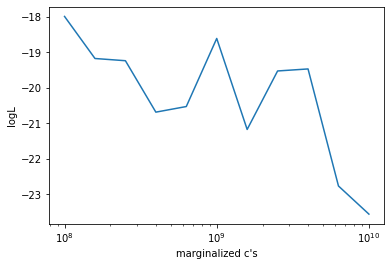

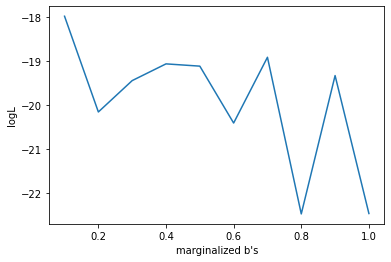

In [63]:
b_vs_c = np.zeros(len(piv))
c_vs_b = np.zeros(len(piv.T))
print(piv)
for i, j in enumerate(piv.T):
    b_vs_c[i] = np.nansum(piv.T[j])
    
for i, j in enumerate(piv):
    #print(np.nansum(piv[j]))
    c_vs_b[i] = np.nansum(piv[j])
    
plt.plot(piv.columns, np.log(c_vs_b))
plt.xlabel("marginalized c's")
plt.ylabel('logL')
plt.xscale('log')
plt.savefig('marginalized_c.pdf', format='pdf')
plt.show()

plt.plot(piv.T.columns, np.log(b_vs_c))
plt.xlabel("marginalized b's")
plt.ylabel('logL')
plt.savefig('marginalized_b.pdf', format='pdf')
plt.show()

5.743576491624109e-21 4.417281179813113e-09 4.265561608148746e-08 -2262.0906319630676 -16.97010689333084
-46.6062048544141 -19.23774144780865


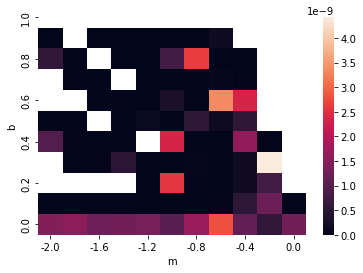

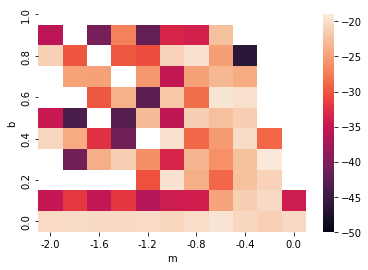

In [64]:
%matplotlib inline

piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['b','m']).sum('normalized_likelihood').reset_index()
#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv[piv['normalized_likelihood'] > 0] # ie. get rid of 0s that will turn into -inf when I log them
piv = piv.pivot("b", "m","normalized_likelihood")
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values), np.nansum(np.log(piv.values)), np.log(np.nansum(piv.values)))
print(np.nanmin(np.log(piv.values)), np.nanmax(np.log(piv.values)))

fig, ax = plt.subplots()
ax = sns.heatmap(piv, xticklabels=df.m.unique().round(1), yticklabels=df.b.unique().round(1))
#ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=True, useMathText=True))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_xticks(ax.get_xticks()[::2]) # sample every other tick, for cleanness
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()
plt.show()

#ax = sns.heatmap(np.log(piv), vmin=-455, vmax=-17.9, xticklabels=df.m.unique().round(1), yticklabels=df.b.unique().round(1))
ax = sns.heatmap(np.log(piv), vmin=-50, vmax=-19, xticklabels=df.m.unique().round(1), 
                 yticklabels=df.b.unique().round(1))

ax.set_xticks(ax.get_xticks()[::2]) # sample every other tick, for cleanness
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()

fig.tight_layout()
plt.savefig('marginalize_c_two_cuts.pdf', format='pdf', bbox_inches='tight')
plt.show()

m            -2.0          -1.8          -1.6          -1.4          -1.2  \
b                                                                           
0.1  1.459664e-09  1.569665e-09  1.247788e-09  1.285761e-09  1.342461e-09   
0.2  5.886677e-16  1.331961e-14  4.721801e-16  1.232690e-14  1.970530e-16   
0.3           NaN           NaN           NaN           NaN  6.973825e-14   
0.4           NaN  1.767938e-18  4.249872e-11  5.030448e-10  4.370378e-12   
0.5  9.534390e-10  3.373463e-11  8.398317e-15  1.588603e-18           NaN   
0.6  8.303258e-16  8.625550e-20           NaN  1.970007e-19  1.248100e-10   
0.7           NaN           NaN  1.117016e-13  5.162689e-11  2.845217e-19   
0.8           NaN  1.730440e-11  1.669858e-11           NaN  7.218259e-12   
0.9  5.815831e-10  9.780899e-14           NaN  1.101489e-13  5.207302e-14   
1.0  3.452870e-16           NaN  2.582810e-18  1.673351e-12  5.118236e-19   

m            -1.0          -0.8          -0.6          -0.4          -0.2  

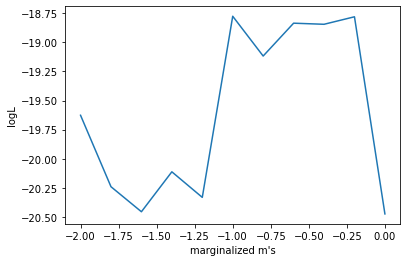

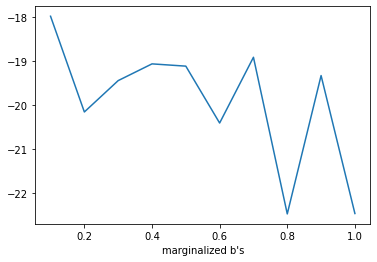

In [65]:
b_vs_m = np.zeros(len(piv))
m_vs_b = np.zeros(len(piv.T))
print(piv)
for i, j in enumerate(piv.T):
    b_vs_m[i] = np.nansum(piv.T[j])
    
for i, j in enumerate(piv):
    m_vs_b[i] = np.nansum(piv[j])
    
plt.plot(piv.columns, np.log(m_vs_b))
plt.xlabel("marginalized m's")
plt.ylabel('logL')
plt.savefig('marginalized_m.pdf', format='pdf')
plt.show()

plt.plot(piv.T.columns, np.log(b_vs_m))
plt.xlabel("marginalized b's")
plt.show()

5.118235745272251e-19 3.3486109495549706e-09 4.265561608148227e-08 -1521.0568123193104 -16.97010689333096
-42.11630696821864 -19.514720219021058


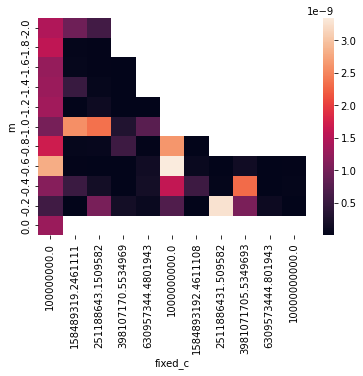

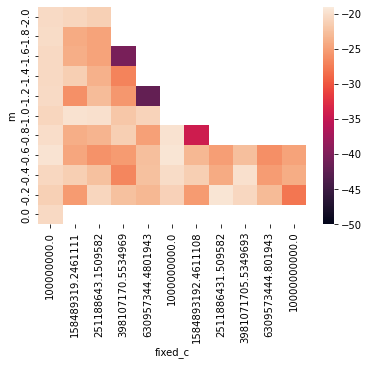

In [36]:
%matplotlib inline

piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c']).sum('normalized_likelihood').reset_index()
#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv[piv['normalized_likelihood'] > 0] # ie. get rid of 0s that will turn into -inf when I log them
piv = piv.pivot("m", "fixed_c","normalized_likelihood") # vs logged_normalized_likelihood
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values), np.nansum(np.log(piv.values)), np.log(np.nansum(piv.values)))
print(np.nanmin(np.log(piv.values)), np.nanmax(np.log(piv.values)))

sns.heatmap(piv, yticklabels=df.m.unique().round(1))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
plt.show()

sns.heatmap(np.log(piv), vmin=-50, vmax=-19, yticklabels=df.m.unique().round(1))
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness

fig.tight_layout()
plt.savefig('marginalize_b_two_cuts.pdf', format='pdf', bbox_inches='tight')
plt.show()

fixed_c  1.000000e+08  1.584893e+08  2.511886e+08   3.981072e+08  \
m                                                                  
-2.0     6.332010e-19  2.413443e-20  3.226865e-26  8.854663e-269   
-1.8     1.160316e-27  4.402888e-23  1.612704e-30  1.084164e-256   
-1.6     6.306056e-33  1.016618e-33  2.888940e-27  9.856356e-221   
-1.4     2.517037e-21  5.390892e-34  1.256278e-26   4.054473e-45   
-1.2     2.224366e-27  1.853278e-27  5.033249e-24   9.876461e-33   
-1.0     1.101818e-32  3.091350e-30  4.439623e-24   2.901040e-22   
-0.8     2.865775e-23  5.585685e-26  7.432609e-35   1.240697e-28   
-0.6     5.315684e-35  2.045566e-31  5.775701e-29   4.204276e-25   
-0.4     6.778655e-21  2.271773e-25  2.173035e-25   7.131845e-28   
-0.2     3.541259e-20  1.698440e-21  6.741383e-23   4.092393e-26   
 0.0     3.055409e-21           NaN           NaN            NaN   

fixed_c   6.309573e+08   1.000000e+09   1.584893e+09   2.511886e+09  \
m                                           

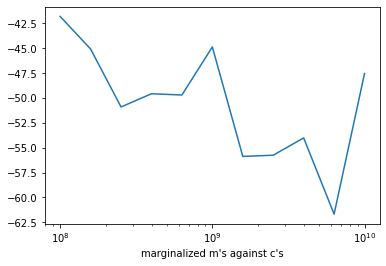

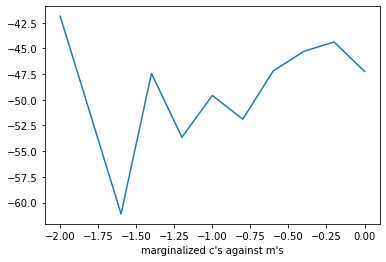

In [86]:
m_vs_c = np.zeros(len(piv))
c_vs_m = np.zeros(len(piv))
print(piv)
for i, j in enumerate(piv.T):
    m_vs_c[i] = np.nansum(piv.T[j])
    
for i, j in enumerate(piv):
    c_vs_m[i] = np.nansum(piv[j])
    
plt.plot(piv.columns, np.log(c_vs_m))
plt.xlabel("marginalized m's against c's")
plt.xscale('log')
plt.show()

plt.plot(piv.T.columns, np.log(m_vs_c))
plt.xlabel("marginalized c's against m's")
plt.show()

In [20]:
df.loc[(df.f == 0.2) &(df.c >9.5e9) &(np.round(df.b,1)==0.3)  ]

,filename,m,b,c,f,logL,transit_multiplicity,intact_frac,disrupted_frac,intact_frac2,...,old45_transit_multiplicity,young50_logL,young50_transit_multiplicity,old50_logL,old50_transit_multiplicity,normalized_transit_multiplicity,normalized_logL,normalized_likelihood,fixed_c,redundant
4739,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-160.969441,"[818.6, 76.60000000000001, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,"[437.0, 38.2]",-226.414898,"[424.0, 41.2]",-271.406338,"[394.6, 35.4]","[937.2933422698839, 87.70665773011618, 0.0, 0....",-159.836931,3.834448e-70,1.000000e+10,False
4740,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-158.477401,"[823.6, 80.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,"[434.8, 43.2]",-218.362575,"[434.0, 40.6]",-266.683537,"[389.6, 39.400000000000006]","[934.2518813634351, 90.74811863656485, 0.0, 0....",-157.976311,2.464677e-69,1.000000e+10,False
4741,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-160.999596,"[805.8000000000001, 77.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,"[443.20000000000005, 38.0]",-242.547547,"[405.8, 42.2]",-267.174895,"[400.0, 34.800000000000004]","[935.5969642048029, 89.4030357951971, 0.0, 0.0...",-158.778903,1.104584e-69,1.000000e+10,False
4742,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-161.873629,"[812.0, 75.60000000000001, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,"[436.6, 36.4]",-230.493987,"[414.20000000000005, 43.800000000000004]",-278.649288,"[397.8, 31.8]","[937.6971608832807, 87.30283911671924, 0.0, 0....",-160.096510,2.957803e-70,1.000000e+10,False
4743,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-163.801782,"[811.8000000000001, 73.2, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,"[450.6, 41.0]",-253.186835,"[407.0, 37.2]",-258.695588,"[404.8, 36.0]","[940.2203389830509, 84.77966101694915, 0.0, 0....",-161.787924,5.450010e-71,1.000000e+10,False
4744,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-157.840005,"[809.4000000000001, 81.4, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,"[434.8, 45.0]",-231.946168,"[418.8, 41.0]",-263.189614,"[390.6, 40.400000000000006]","[931.3370004490347, 93.66299955096542, 0.0, 0....",-156.342872,1.262274e-68,1.000000e+10,False
4745,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-162.564889,"[809.6, 74.8, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,"[459.40000000000003, 39.6]",-251.643830,"[400.20000000000005, 40.800000000000004]",-259.542286,"[409.40000000000003, 34.0]","[938.3084577114428, 86.6915422885572, 0.0, 0.0...",-160.495215,1.985243e-70,1.000000e+10,False
4746,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-156.863682,"[834.0, 82.4, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,"[442.40000000000003, 40.800000000000004]",-206.755840,"[438.20000000000005, 44.2]",-262.676409,"[395.8, 38.2]","[932.8350065473593, 92.16499345264077, 0.0, 0....",-157.164574,5.549998e-69,1.000000e+10,False
4747,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-161.907280,"[817.4000000000001, 75.4, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,"[433.8, 38.800000000000004]",-230.794022,"[423.8, 39.400000000000006]",-270.867862,"[393.6, 36.0]","[938.435259856631, 86.56474014336918, 0.0, 0.0...",-160.578795,1.826062e-70,1.000000e+10,False
4748,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-154.589947,"[815.4000000000001, 86.60000000000001, 0.0, 0....",0.000000,0.200000,0.000000,...,"[451.0, 47.6]",-232.758788,"[410.0, 44.800000000000004]",-243.845246,"[405.40000000000003, 41.800000000000004]","[926.5909090909092, 98.4090909090909, 0.0, 0.0...",-153.975077,1.347330e-67,1.000000e+10,False


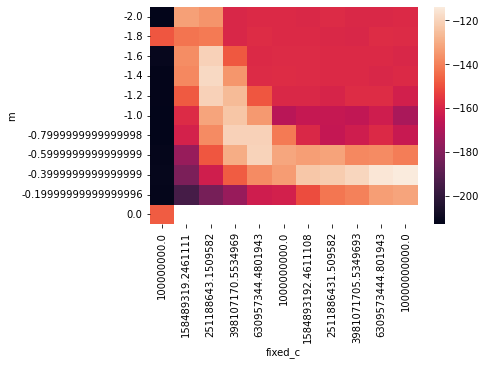

In [20]:
%matplotlib inline

piv = df.loc[df.f == 0.2].groupby(['m','fixed_c']).mean('normalized_logL').reset_index().rename(columns={0:'mean_likelihood'})
piv = piv.pivot("m", "fixed_c", "normalized_logL")
sns.heatmap(piv)
plt.show()

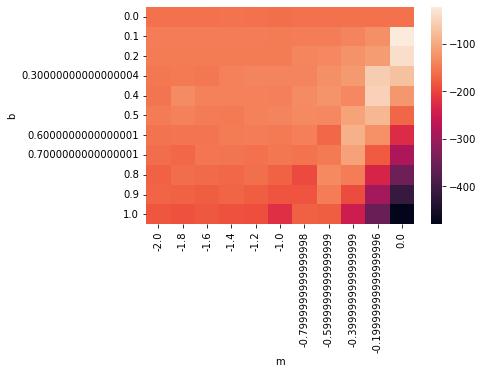

In [21]:
%matplotlib inline

piv = df.loc[df.f == 0.2].groupby(['b','m']).mean('normalized_logL').reset_index().rename(columns={0:'mean_likelihood'})
piv = piv.pivot("b", "m", "normalized_logL")
sns.heatmap(piv)
plt.show()

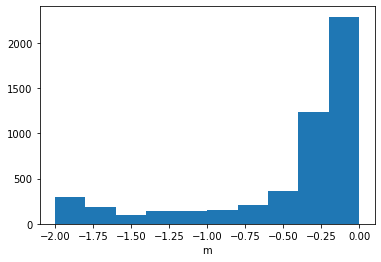

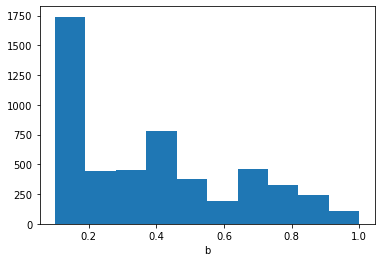

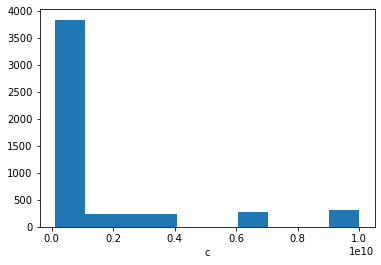

In [22]:
plt.hist(df_keep.m)
plt.xlabel('m')
plt.show()

plt.hist(df_keep.b)
plt.xlabel('b')
plt.show()

plt.hist(df_keep.fixed_c)
plt.xlabel('c')
plt.show()

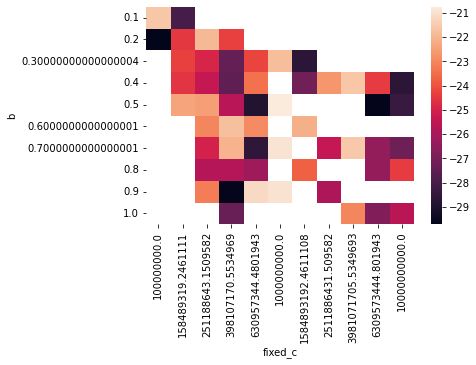

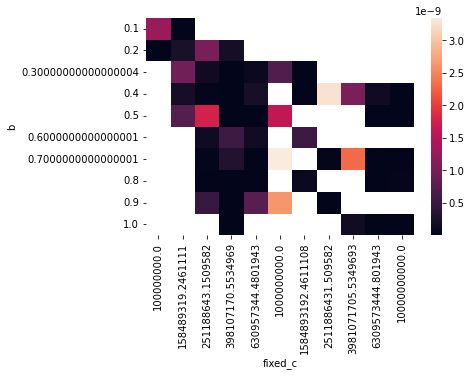

In [23]:
### mean of logL

piv = df_keep.groupby(['b','fixed_c']).mean('normalized_logL').reset_index()
#print(df_keep.groupby(['b','fixed_c']).sum('likelihood').reset_index())
#piv['logL_new'] = np.log(piv.likelihood)
piv = piv.pivot("b", "fixed_c", "normalized_logL")
sns.heatmap(piv)
plt.show()

piv = df_keep.groupby(['b','fixed_c']).mean('normalized_likelihood').reset_index().rename(columns={0:'mean_likelihood'})
piv = piv.pivot("b", "fixed_c", "normalized_likelihood")
sns.heatmap(piv)
plt.show()

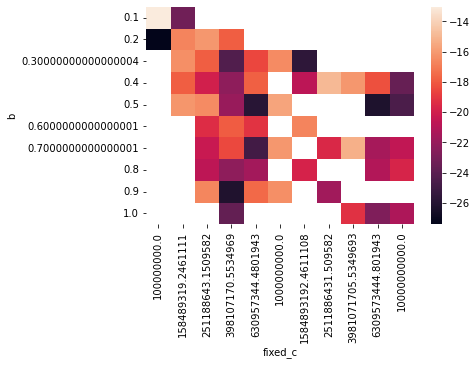

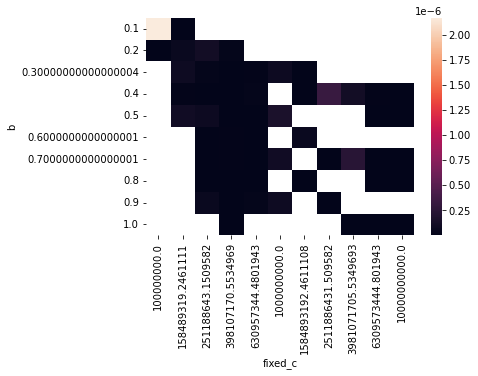

In [24]:
### sum of likelihood, and then re-logged

piv = df_keep.groupby(['b','fixed_c']).sum('normalized_likelihood').reset_index().rename(columns={0:'sum_likelihood'})
#print(df_keep.groupby(['b','fixed_c']).sum('likelihood').reset_index())
piv['logL_new'] = np.log(piv.normalized_likelihood)
piv = piv.pivot("b", "fixed_c", "logL_new")
sns.heatmap(piv)
plt.show()

piv = df_keep.groupby(['b','fixed_c']).sum('normalized_likelihood').reset_index().rename(columns={0:'sum_likelihood'})
piv = piv.pivot("b", "fixed_c", "normalized_likelihood")
sns.heatmap(piv)
plt.show()

In [25]:
df_a = df_keep.loc[(np.round(df_keep.b,1) == 0.3) & (df_keep.fixed_c > 6e8) & (df_keep.fixed_c < 1e9)]

In [26]:
df_b = df_keep.loc[(np.round(df_keep.b,1) == 0.4) & (df_keep.fixed_c > 6e8) & (df_keep.fixed_c < 1e9)]

In [27]:
df_c = df_keep.loc[(np.round(df_keep.b,1) == 0.5) & (df_keep.fixed_c > 6e8) & (df_keep.fixed_c < 1e9)]

In [28]:
df_z = df_keep.loc[(np.round(df_keep.b,1) == 1.0) & (df_keep.fixed_c > 6e8) & (df_keep.fixed_c < 1e9)]

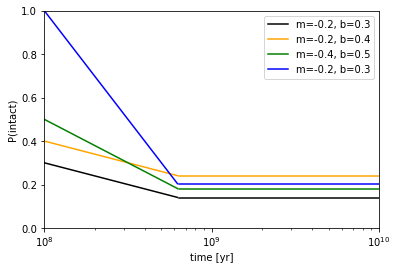

In [29]:
def compute_prob(x, m, b, c):
    return b + m*(np.log10(x)-8)

def compute_prob_after_cutoff(x, m, b, c):
    return b + m*(np.log10(c)-8)
    
%matplotlib inline
x = np.linspace(1e8, 1e10, 1000)
m = -0.2
b = 0.3
c = 6.3e8

plt.plot(x[x < c], compute_prob(x[x < c], m, b, c), color='k', label='m=-0.2, b=0.3')
plt.plot(x[x >= c], np.ones(len(x[x >= c]))*compute_prob_after_cutoff(x[x >= c], m, b, c), color='k')

m = -0.2
b = 0.4
c = 6.3e8

plt.plot(x[x < c], compute_prob(x[x < c], m, b, c), color='orange', label='m=-0.2, b=0.4')
plt.plot(x[x >= c], np.ones(len(x[x >= c]))*compute_prob_after_cutoff(x[x >= c], m, b, c), color='orange')

m = -0.4
b = 0.5
c = 6.3e8

plt.plot(x[x < c], compute_prob(x[x < c], m, b, c), color='green', label='m=-0.4, b=0.5')
plt.plot(x[x >= c], np.ones(len(x[x >= c]))*compute_prob_after_cutoff(x[x >= c], m, b, c), color='green')

m = -1.0
b = 1.0
c = 6.3e8

plt.plot(x[x < c], compute_prob(x[x < c], m, b, c), color='blue', label='m=-0.2, b=0.3')
plt.plot(x[x >= c], np.ones(len(x[x >= c]))*compute_prob_after_cutoff(x[x >= c], m, b, c), color='blue')

plt.xlim(1e8, 1e10)
plt.ylim(0, 1)
plt.xscale('log')
plt.ylabel('P(intact)')
plt.xlabel('time [yr]')
plt.legend()
plt.show()

#### Zero-bin

Favored models

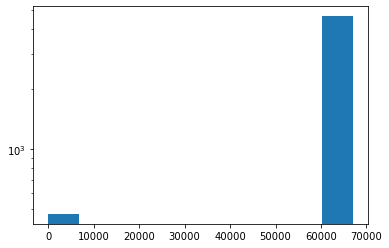

In [49]:
zero_bins = []
transit_multiplicity_zero_bin = []
for j, i in enumerate(df.normalized_transit_multiplicity_zero_bin):
    zero_bins.append(67380-np.sum(i))
    temp = df_keep.reset_index().transit_multiplicity[j]
    temp.insert(0,67380 - np.sum(i))
    transit_multiplicity_zero_bin.append(temp)
    #print(df_keep.reset_index().transit_multiplicity[j])
    #adsfadfdf
    #transit_multiplicity_zero_bin = df_keep.reset_index().transit_multiplicity[j].insert(0,67380 - np.sum(i))
#df_keep['transit_multiplicity_zero_bin'] = transit_multiplicity_zero_bin

plt.hist(zero_bins)
#plt.xscale('log')
plt.yscale('log')
plt.show()

In [50]:
df_keep['transit_multiplicity_zero_bin'] = transit_multiplicity_zero_bin

/var/folders/h2/sp_lfvz5515bhg_y92psw7f80000gn/T/ipykernel_1768/930433814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keep['transit_multiplicity_zero_bin'] = transit_multiplicity_zero_bin


In [51]:
df_keep['transit_multiplicity_zero_bin']

1220     [66902.3, 397.90000000000003, 54.4000000000000...
1221     [66905.7, 400.70000000000005, 47.1, 12.3, 9.0,...
1222     [66905.2, 397.70000000000005, 50.5, 14.5, 6.80...
1223     [66909.0, 394.40000000000003, 49.7, 12.6000000...
1224     [1.4551915228366852e-11, 66922.7, 377.90000000...
                               ...                        
73277    [62527.0, 4010.0, 555.0, 123.0, 90.0, 56.0, 19.0]
73278     [62756.0, 3801.0, 550.0, 119.0, 95.0, 50.0, 9.0]
73279     [62774.0, 3878.0, 480.0, 124.0, 85.0, 35.0, 4.0]
73280     [62762.0, 3881.0, 498.0, 115.0, 82.0, 33.0, 9.0]
73281    [0.0, 62687.0, 3902.0, 541.0, 134.0, 73.0, 35....
Name: transit_multiplicity_zero_bin, Length: 5120, dtype: object

/var/folders/h2/sp_lfvz5515bhg_y92psw7f80000gn/T/ipykernel_1768/1353789934.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keep['normalized_transit_multiplicity_w_zero'] = df_keep.apply(func=normalize, axis=1)


1220     [143552.1404647268, 853.7732886749006, 116.725...
1221     [144588.53573687538, 865.9445498629559, 101.78...
1222     [144435.1937657961, 858.5562342038753, 109.019...
1223     [145608.75796178344, 858.3014861995755, 108.15...
1224     [2.2136706899786325e-13, 1018.0434476105671, 5...
                               ...                        
73277    [13206.30022666392, 846.9503399958788, 117.221...
73278    [13911.09429065744, 842.5659602076124, 121.918...
73279    [13969.463742943986, 862.9939209726443, 106.81...
73280    [13930.500216543958, 861.4172802078822, 110.53...
73281    [0.0, 953.6090086078955, 59.35811813594538, 8....
Name: normalized_transit_multiplicity_w_zero, Length: 5120, dtype: object


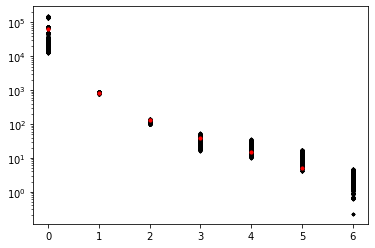

In [57]:
def normalize(curr_row: pd.Series):
    """
    First, remove fraction of planet-hosting systems from each multiplicity. 
    Then, normalize against sample total planet-hosting systems. 
    """
    #print(curr_row)
    first = curr_row['transit_multiplicity']
    #first += [0.] * (6 - len(first)) # pad with zeros to match length of k
    #second = curr_row['f']
    #print(first)
    #print(second)
    
    try:
        # remove previous normalization
        #first = [np.array(fl)/second for fl in first[1:]] # sum only 1+ bins
    
        # normalize against Kepler data s.t. sum of every transit multiplicity is 1025
        return [np.array(fl)*sum(k)/sum(first[1:]) for fl in first]
    
    except Exception as e: # return list of N nans, where N is length of transit multiplicity array    
        print(e)
        try: # eg. divide by zero for f=0; we don't care about those
            return np.nan*np.ones(len(first))
        
        except: # eg. accessed one too many levels
            return np.nan  

df_keep['normalized_transit_multiplicity_w_zero'] = df_keep.apply(func=normalize, axis=1)
print(df_keep['normalized_transit_multiplicity_w_zero'])

for i in range(len(df_keep)):
    try:
        plt.scatter(np.arange(7), df_keep.reset_index().normalized_transit_multiplicity_w_zero[i], s=5, color='k')
    except:
        pass
plt.scatter(np.arange(7), nonzero_k, color='red', zorder=2, s=10)
plt.yscale('log')
plt.show()




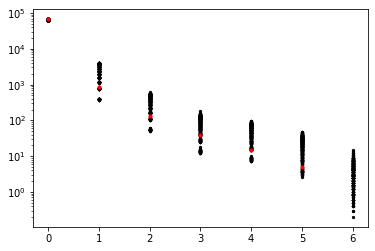

In [25]:
for i in range(len(df_keep)):
    plt.scatter(np.arange(7), df_keep.reset_index().transit_multiplicity_zero_bin[i], s=5, color='k')
plt.scatter(np.arange(7), nonzero_k, color='red', zorder=2, s=10)
plt.yscale('log')
plt.show()

All models

In [35]:
df

,filename,m,b,c,f,logL,transit_multiplicity,intact_frac,disrupted_frac,intact_frac2,...,old45_transit_multiplicity,young50_logL,young50_transit_multiplicity,old50_logL,old50_transit_multiplicity,normalized_transit_multiplicity,normalized_logL,normalized_likelihood,fixed_c,redundant
0,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.0,1.000000e+08,0.0,-5434.568555,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,...,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]","[nan, nan, nan, nan, nan, nan]",NaN,NaN,100000000.0,True
1,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.0,1.000000e+08,0.0,-5434.568555,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,...,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]","[nan, nan, nan, nan, nan, nan]",NaN,NaN,100000000.0,True
2,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.0,1.000000e+08,0.0,-5434.568555,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,...,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]","[nan, nan, nan, nan, nan, nan]",NaN,NaN,100000000.0,True
3,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.0,1.000000e+08,0.0,-5434.568555,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,...,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]","[nan, nan, nan, nan, nan, nan]",NaN,NaN,100000000.0,True
4,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.0,1.000000e+08,0.0,-5434.568555,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,...,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]","[nan, nan, nan, nan, nan, nan]",NaN,NaN,100000000.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78315,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,1.0,1.000000e+10,0.9,-3811.522896,"[2277.9, 1598.4, 1112.4, 762.3000000000001, 36...",0.9,0.0,1.0,...,"[1252.8, 875.7, 601.2, 420.3, 189.9, 37.800000...",-1478.074096,"[1147.5, 812.7, 570.6, 384.3, 201.6, 50.4]",-1365.080776,"[1130.4, 785.7, 541.8000000000001, 378.0, 166....","[376.52757619738753, 264.2089985486212, 183.87...",-480.541302,2.011704e-209,100000000.0,True
78316,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,1.0,1.000000e+10,0.9,-3805.139345,"[2264.4, 1539.0, 1152.9, 797.4, 366.3, 66.6000...",0.9,0.0,1.0,...,"[1232.1000000000001, 825.3000000000001, 635.4,...",-1468.749064,"[1161.9, 790.2, 573.3000000000001, 405.0, 198....",-1376.593747,"[1102.5, 748.8000000000001, 579.6, 392.4000000...","[375.16729706139074, 254.98254291533314, 191.0...",-486.174721,7.194512e-212,100000000.0,True
78317,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,1.0,1.000000e+10,1.0,-4400.422949,"[2612.0, 1717.0, 1259.0, 816.0, 430.0, 86.0]",1.0,0.0,1.0,...,"[1423.0, 956.0, 693.0, 450.0, 227.0, 42.0]",-1691.015415,"[1337.0, 861.0, 643.0, 407.0, 223.0, 50.0]",-1611.277304,"[1275.0, 856.0, 616.0, 409.0, 207.0, 36.0]","[386.89306358381504, 254.32442196531792, 186.4...",-462.889185,9.327843e-202,100000000.0,True
78318,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,1.0,1.000000e+10,1.0,-4392.528368,"[2531.0, 1776.0, 1236.0, 847.0, 409.0, 91.0]",1.0,0.0,1.0,...,"[1392.0, 973.0, 668.0, 467.0, 211.0, 42.0]",-1721.979568,"[1275.0, 903.0, 634.0, 427.0, 224.0, 56.0]",-1594.186247,"[1256.0, 873.0, 602.0, 420.0, 185.0, 35.0]","[376.52757619738753, 264.2089985486212, 183.87...",-480.541302,2.011704e-209,100000000.0,True


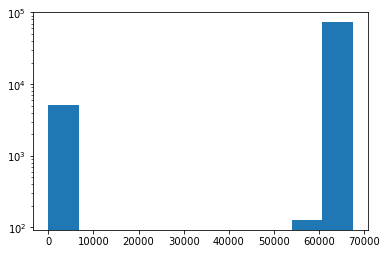

In [36]:
zero_bins = []
transit_multiplicity_zero_bin = []
for j, i in enumerate(df.transit_multiplicity):
    zero_bins.append(67380-np.sum(i))
    temp = df.reset_index().transit_multiplicity[j]
    temp.insert(0,67380 - np.sum(i))
    transit_multiplicity_zero_bin.append(temp)
    #print(df_keep.reset_index().transit_multiplicity[j])
    #adsfadfdf
    #transit_multiplicity_zero_bin = df_keep.reset_index().transit_multiplicity[j].insert(0,67380 - np.sum(i))
#df_keep['transit_multiplicity_zero_bin'] = transit_multiplicity_zero_bin

plt.hist(zero_bins)
#plt.xscale('log')
plt.yscale('log')
plt.show()

In [41]:
df['transit_multiplicity_zero_bin'] = transit_multiplicity_zero_bin

ValueError: Length of values (470) does not match length of index (78320)

In [38]:
df.transit_multiplicity_zero_bin

0                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
4                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
                               ...                        
78315    [61179.0, 2277.9, 1598.4, 1112.4, 762.30000000...
78316    [61193.4, 2264.4, 1539.0, 1152.9, 797.4, 366.3...
78317    [60460.0, 2612.0, 1717.0, 1259.0, 816.0, 430.0...
78318    [60490.0, 2531.0, 1776.0, 1236.0, 847.0, 409.0...
78319    [60506.0, 2516.0, 1710.0, 1281.0, 886.0, 407.0...
Name: transit_multiplicity_zero_bin, Length: 78320, dtype: object

In [ ]:
exceptions = 0
for i in range(len(df)):
    try:
        plt.scatter(np.arange(7), df.reset_index().transit_multiplicity_zero_bin[i], s=5, color='k')
    except:
        #print(df.reset_index().transit_multiplicity_zero_bin[i])
        exceptions += 1

print(exceptions)
plt.scatter(np.arange(7)[1:], k, color='red', zorder=2, s=10)
plt.yscale('log')
plt.show()

#### Do the favored normalized models produce reasonable transit multiplicities and intact fractions? 

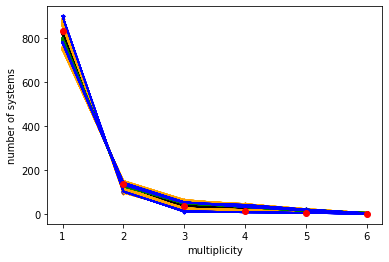

In [58]:
for i in df_a.normalized_transit_multiplicity:
    plt.scatter(np.arange(7)[1:], i, color='k', s=5)
    plt.plot(np.arange(7)[1:], i, color='k')

for i in df_b.normalized_transit_multiplicity:
    plt.scatter(np.arange(7)[1:], i, color='orange', s=5)
    plt.plot(np.arange(7)[1:], i, color='orange')
    
for i in df_c.normalized_transit_multiplicity:
    plt.scatter(np.arange(7)[1:], i, color='green', s=5)
    plt.plot(np.arange(7)[1:], i, color='green')
    
for i in df_z.normalized_transit_multiplicity:
    plt.scatter(np.arange(7)[1:], i, color='blue', s=5)
    plt.plot(np.arange(7)[1:], i, color='blue')
    
plt.scatter(np.arange(7)[1:], k, color='red', zorder=2)
    
plt.ylabel('number of systems')
plt.xlabel('multiplicity')
plt.show()

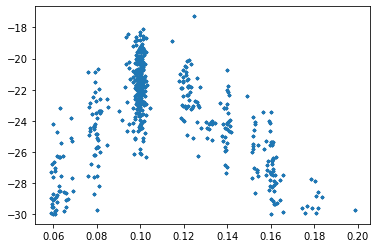

In [ ]:
plt.scatter(df_keep.intact_frac2, df_keep.normalized_logL, s=5)
plt.show()

No.

In [60]:
print(np.median(df_a.normalized_transit_multiplicity.to_list(), axis=0)) # m=-0.2
print(np.median(df_b.normalized_transit_multiplicity.to_list(), axis=0)) # m=-0.2
print(np.median(df_c.normalized_transit_multiplicity.to_list(), axis=0)) # m=-0.4
print(np.median(df_z.normalized_transit_multiplicity.to_list(), axis=0)) # what? oh, it's cause m=-1.0

print(better_loglike(np.median(df_a.normalized_transit_multiplicity.to_list(), axis=0), k))
print(better_loglike(np.median(df_b.normalized_transit_multiplicity.to_list(), axis=0), k))
print(better_loglike(np.median(df_c.normalized_transit_multiplicity.to_list(), axis=0), k))
print(better_loglike(np.median(df_z.normalized_transit_multiplicity.to_list(), axis=0), k))

[821.76976037 124.00062276  37.00841174  25.8739389   12.51112424
   3.09795659]
[860.67029786 113.74907643  25.03023066  17.36566619   8.03430725
   2.20892988]
[790.9934232  129.37119796  49.12096259  33.70498153  15.42104753
   3.22640934]
[781.47678897 132.48997996  50.3256513   31.37543077  16.83052909
   1.66666667]
-23.61041734842737
-22.498826282832255
-31.530187010266495
-30.464266012068126


Looks like the problem of non-smooth color gradients in the heatmap comes largely from the fact that 11x11x11 is just not fine enough of a sample grid. Also, small number statistics...but the variances in logL aren't big enough to explain that away. 

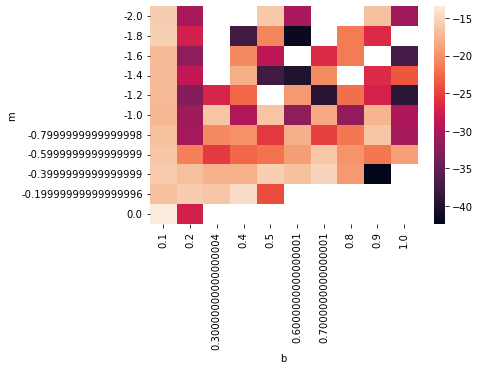

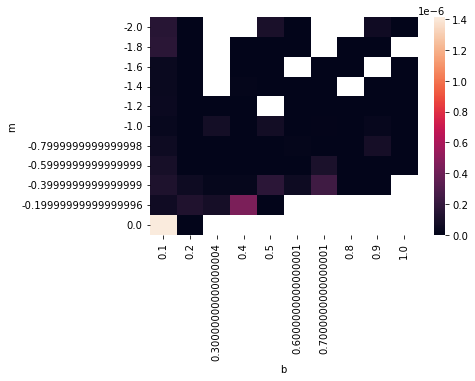

In [61]:
piv = df_keep.groupby(['m','b']).sum('normalized_likelihood').reset_index().rename(columns={0:'sum_likelihood'})
#print(df_keep.groupby(['b','fixed_c']).sum('likelihood').reset_index())
piv['logL_new'] = np.log(piv.normalized_likelihood)
piv = piv.pivot("m", "b", "logL_new")
sns.heatmap(piv)
plt.show()

piv = df_keep.groupby(['m','b']).sum('normalized_likelihood').reset_index().rename(columns={0:'sum_likelihood'})
piv = piv.pivot("m", "b", "normalized_likelihood")
sns.heatmap(piv)
plt.show()

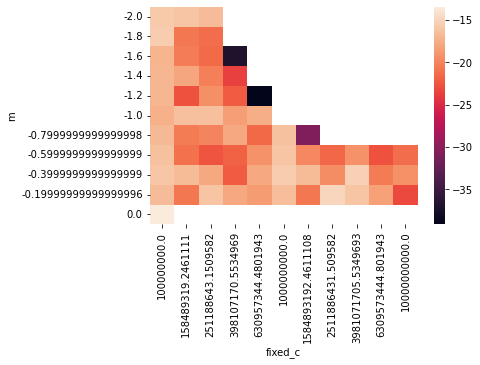

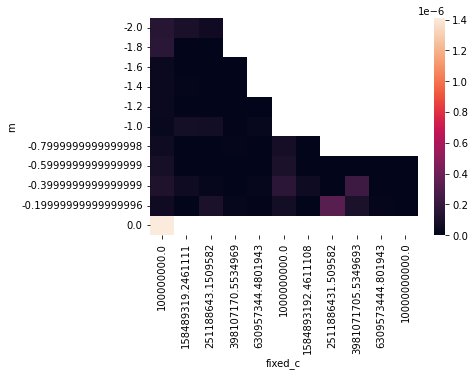

In [62]:
piv = df_keep.groupby(['m','fixed_c']).sum('normalized_likelihood').reset_index().rename(columns={0:'sum_likelihood'})
#print(df_keep.groupby(['b','fixed_c']).sum('likelihood').reset_index())
piv['logL_new'] = np.log(piv.normalized_likelihood)
piv = piv.pivot("m", "fixed_c", "logL_new")
sns.heatmap(piv)
plt.show()

piv = df_keep.groupby(['m','fixed_c']).sum('normalized_likelihood').reset_index().rename(columns={0:'sum_likelihood'})
piv = piv.pivot("m", "fixed_c", "normalized_likelihood")
sns.heatmap(piv)
plt.show()

### emcee

In [25]:
import emcee

def log_prob():
    return 

In [30]:
ndim, nwalkers = 3, 10
ivar = 1. / np.random.rand(ndim)
print(ivar)
p0 = np.random.randn(nwalkers, ndim)
print(p0)

#sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[ivar])
#sampler.run_mcmc(p0, 10000)

[1.50444437 1.16968888 1.34632016]
[[ 0.13901097 -1.25832079 -0.99180628]
 [-0.40180879  0.65863629 -2.20360307]
 [-0.83511283  0.66110892 -0.09119209]
 [ 0.11055307 -1.89515115  1.47381738]
 [-1.01144396  0.35205247 -0.33664609]
 [ 1.42185461 -0.56092347 -0.06399069]
 [ 0.33149321 -0.36662715 -0.80829745]
 [-1.50606791 -0.77259987 -1.03836678]
 [-0.2821688  -2.22714138 -0.08295806]
 [-0.65497419 -1.67212723 -0.06213843]]


In [ ]:
p0 = np.random.rand(10, 1)
